<center><font size = "10"> Week 9 - Cells in Space  <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 1
<br>Group member1: Milo Imbeni
<br>Group member2: Gasser Elbanna
<br>Group member3: Louise Placidet

# Ex1. Placing cells in a cubic volume

<font size='3'>Define a cubic volume with the following dimensions: x = (2000, 5000), y = (2000, 5000), z = (-1000, 2000). Place the five morphologies assigned to your group (used in week2 and week7) in random positions inside the cube. Visualize the cells in the cube in three different planes: xy, xz and yz. [1 pt]

### Defining a cubic volume and sampling random positions inside of it:

In [1]:
import numpy as np
rng = np.random.default_rng()

N = 5 # number of positions for the 5 morphologies of our group
volume = [[2000,5000],[2000,5000],[-1000,2000]] # volume bounds [um]

# get positions in required ranges
pos = rng.random((N,3)) # in [0,1)
for i,x in enumerate(volume):
    pos[:,i] = (x[1] - x[0]) * pos[:,i] + x[0]
    
pos # print positions

array([[4688.12901252, 3563.64547364, -702.39144627],
       [3624.89147399, 3445.15058825, 1252.06786506],
       [2591.3493715 , 3265.42809029, -455.33236857],
       [3718.15496154, 3092.28022062, -270.85106453],
       [2844.52241741, 2550.3180335 , 1402.40695309]])

### Loading the 5 Morphologies and placing them randomly inside the cube after centering them:

In [2]:
def shift_morphology(morph,shift):
    morph.soma.points[:,[0,1,2]] += shift
    for n in morph.neurites:
        n.points[:,[0,1,2]] += shift

def center_morphology(morph):
    center = morph.soma.center.copy()
    shift_morphology(morph,-center)

In [3]:
import neurom as nm
morph_files = ['morph_03.swc','morph_06.swc','morph_07.swc','morph_09.swc','morph_10.swc']
morphs = [nm.load_neuron(x) for x in morph_files]

# place all morphologies
for i,m in enumerate(morphs):
    center_morphology(m)
    shift_morphology(m,pos[i])

[x.soma.center for x in morphs] # print centers

[array([4688.12901252, 3563.64547364, -702.39144627]),
 array([3624.89147399, 3445.15058825, 1252.06786506]),
 array([2591.3493715 , 3265.42809029, -455.33236857]),
 array([3718.15496154, 3092.28022062, -270.85106453]),
 array([2844.52241741, 2550.3180335 , 1402.40695309])]

### Visualize the cells in the cube in three different planes: xy, xz and yz

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import neurom as nm

# Poorman's plotting of morphologies
def plot_morphology(morph,color = None,plane = 'XY',somaOnly = False):
    colors = ['','','black','blue','red','green'] # colors for: soma, axon, basal, apical
    planes = { 'XY': [0,1], 'XZ': [0,2], 'YZ': [1,2], 'YX': [1,0], 'ZX': [2,0], 'ZY': [2,1] }
    if color is not None:
        colors = ['','','black',color,color,color]
    if not somaOnly:
        for n in morph.neurites:
            pts = n.points[:,[0,1,2]]
            plt.scatter(pts[:,planes[plane][0]],pts[:,planes[plane][1]],s=1,c=colors[n.type.value],marker='.')
    pts = morph.soma.center
    plt.scatter(pts[planes[plane][0]],pts[planes[plane][1]],c=colors[nm.NeuriteType.soma.value],marker='D')


def plot_morphologies(morphlist,plane = 'XY',somaOnly = False):
    colors = ['red','green','blue','magenta','cyan','yellow','orange','purple','brown']
    if len(morphlist) is 1:
        colors = [None]
    if somaOnly:
        colors = ['black' for i in range(0,len(morphlist))]
    fig = plt.figure()
    fig.suptitle(plane)
    for i,m in enumerate(morphlist):
        plot_morphology(m,colors[i % len(colors)],plane = plane,somaOnly = somaOnly)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


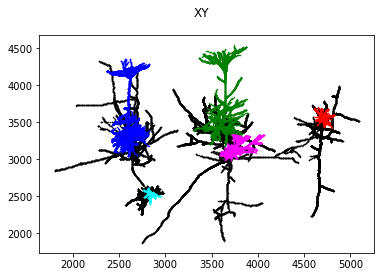

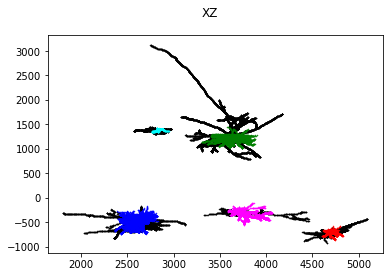

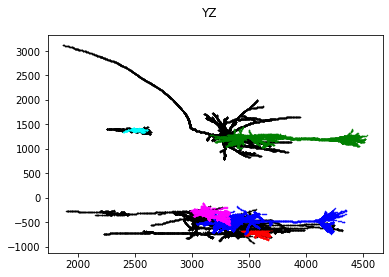

In [5]:
# Plot whole morphologies

plane_setting = ['XY', 'XZ', 'YZ']
for i,plane in enumerate(plane_setting):
    plot_morphologies(morphs, plane = plane)


## Ex2. Cells rotation

<font size='3'>Compute a 2D rotation along the z axis on the inhibitory cells from your data set, the rotation angles should be: 90°, 180° and 270°. Plot the results in xy plane. Compute a 3D rotation to aling the pyramidal cells x axis with the vector (2,1,5). [1.5 pts]

<span style="color:red"> Restart kernel out of precaution

### Loading the inhibitory cells:

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import neurom as nm

# Load inhibitory morphologies
morph1 = nm.load_neuron('morph_03.swc')
morph2 = nm.load_neuron('morph_10.swc')

morphs = [morph1, morph2]

In [2]:
# Loading useful functions

# Shifting and Centering Functions
def shift_morphology(morph,shift):
    morph.soma.points[:,[0,1,2]] += shift
    for n in morph.neurites:
        n.points[:,[0,1,2]] += shift

def center_morphology(morph):
    center = morph.soma.center.copy()
    shift_morphology(morph,-center)
    
# Plotting Functions
import matplotlib.pyplot as plt
import neurom as nm

# Poorman's plotting of morphologies
def plot_morphology(morph,color = None,plane = 'XY',somaOnly = False):
    colors = ['','','black','blue','red','green'] # colors for: soma, axon, basal, apical
    planes = { 'XY': [0,1], 'XZ': [0,2], 'YZ': [1,2], 'YX': [1,0], 'ZX': [2,0], 'ZY': [2,1] }
    if color is not None:
        colors = ['','','black',color,color,color]
    if not somaOnly:
        for n in morph.neurites:
            pts = n.points[:,[0,1,2]]
            plt.scatter(pts[:,planes[plane][0]],pts[:,planes[plane][1]],s=1,c=colors[n.type.value],marker='.')
    pts = morph.soma.center
    plt.scatter(pts[planes[plane][0]],pts[planes[plane][1]],c=colors[nm.NeuriteType.soma.value],marker='D')


def plot_morphologies(morphlist,plane = 'XY',somaOnly = False):
    colors = ['red','green','blue','magenta','cyan','yellow','orange','purple','brown']
    if len(morphlist) is 1:
        colors = [None]
    if somaOnly:
        colors = ['black' for i in range(0,len(morphlist))]
    fig = plt.figure()
    fig.suptitle(plane)
    for i,m in enumerate(morphlist):
        plot_morphology(m,colors[i % len(colors)],plane = plane,somaOnly = somaOnly)

PLOTTING BEFORE ROTATION:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


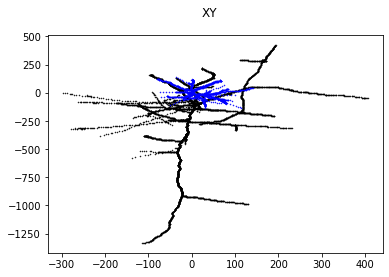

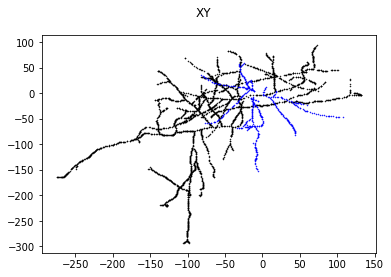

In [3]:
# Center morphologies
for morph in morphs:
    center_morphology(morph)

print('PLOTTING BEFORE ROTATION:')
plot_morphologies([morph1])
plot_morphologies([morph2])

### Computing a 2D rotation along the z axis on the inhibitory cells from your data set

In [4]:
import numpy as np
# Rotation matrix around Z axis, angle theta CCW (degrees)
def rotz(theta):
    radtheta = theta * np.pi / 180.0 # in radians
    R = np.array([[np.cos(radtheta),-np.sin(radtheta),0],
                  [np.sin(radtheta),np.cos(radtheta),0],
                  [0,0,1]])
    return R


# apply rotation matrix R
def rotate_morphology(morph,R):
    morph.soma.points[:,[0,1,2]] = R.dot(morph.soma.points[:,[0,1,2]].T).T
    for n in morph.neurites:
        n.points[:,[0,1,2]] = R.dot(n.points[:,[0,1,2]].T).T

def rotz_morphology(morph,theta):
    R = rotz(theta)
    rotate_morphology(morph,R)
    
# Modifying the function so as to precise the angle of rotation
def plot_morphologies_with_rot(morphlist, angle_of_rot, plane = 'XY',somaOnly = False):
    colors = ['red','green','blue','magenta','cyan','yellow','orange','purple','brown']
    if len(morphlist) is 1:
        colors = [None]
    if somaOnly:
        colors = ['black' for i in range(0,len(morphlist))]
    fig = plt.figure()
    fig.suptitle(plane+' with rotation angle '+str(angle_of_rot)+'°')
    for i,m in enumerate(morphlist):
        plot_morphology(m,colors[i % len(colors)],plane = plane,somaOnly = somaOnly)


### Plotting the reults in xy plan:

#### --> For Inhibitory Neuron 1:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


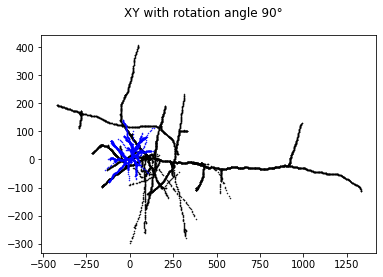

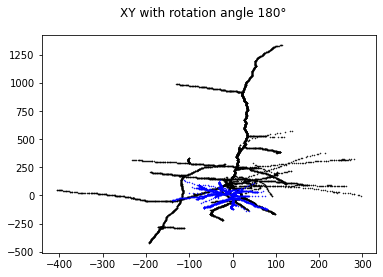

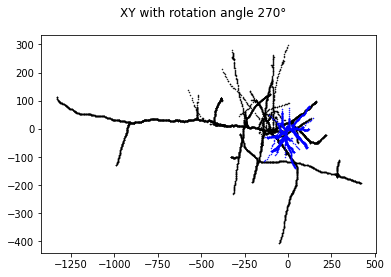

In [5]:
# Doing first rotation rotation at 90°
rotz_morphology(morph1,90)
plot_morphologies_with_rot([morph1], angle_of_rot = 90)

# Doing second rotation rotation at 180°
rotz_morphology(morph1,90)
plot_morphologies_with_rot([morph1], angle_of_rot = 180)

# Doing first rotation rotation at 270°
rotz_morphology(morph1,90)
plot_morphologies_with_rot([morph1], angle_of_rot = 270)

#### --> For Inhibitory Neuron 2:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


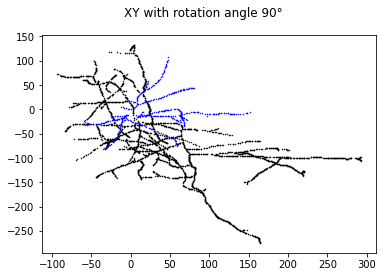

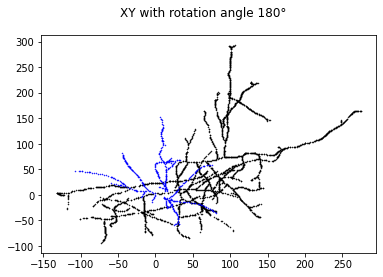

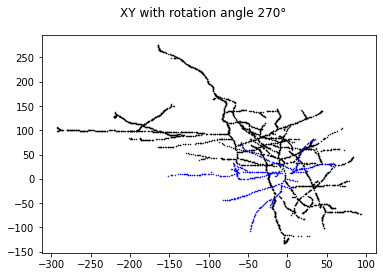

In [6]:
# Doing first rotation rotation at 90°
rotz_morphology(morph2,90)
plot_morphologies_with_rot([morph2], angle_of_rot = 90)

# Doing second rotation rotation at 180°
rotz_morphology(morph2,90)
plot_morphologies_with_rot([morph2], angle_of_rot = 180)

# Doing first rotation rotation at 270°
rotz_morphology(morph2,90)
plot_morphologies_with_rot([morph2], angle_of_rot = 270)

### Computing a 3D rotation to aling the pyramidal cells x axis with the vector (2,1,5)

In [7]:
def align_morphology_X(morph,axis):
    # Rotation matrix that aligns the X axis [1,0,0] to an arbitrary vector b (other than Y or -Y)
    # From https://math.stackexchange.com/a/476311
    a = np.array([1,0,0])

    b = np.array(axis) # target axis
    b = b / np.linalg.norm(b) # make unit norm

    v = np.cross(a,b)     # a x b
    s = np.linalg.norm(v) # ||v|| = sin(theta)
    c = a.dot(b)          # a . b = cos(theta)

    # Skew-symmetric cross-product matrix
    V = np.zeros((3,3))
    V[0,1] = -v[2]
    V[1,0] =  v[2]
    V[0,2] =  v[1]
    V[2,0] = -v[1]
    V[1,2] = -v[0]
    V[2,1] =  v[0]

    # Rotation matrix
    R = np.diag((1.0,1.0,1.0))
    R += V
    R += V.dot(V) * (1.0 - c) / (s * s)

    # Test
    if not np.max(R.dot(a) - b) < 1E-12:
        raise ValueError('Matrix not good!')
    
    # Rotate morphology
    rotate_morphology(morph,R)

In [8]:
# Defining the alignment vector:
align_vec = [2,1,5]

### --> For Inhibitory Cell 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


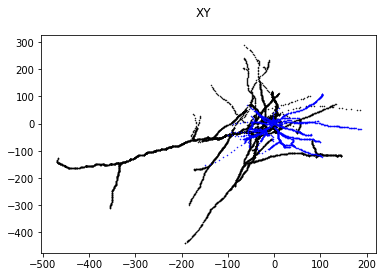

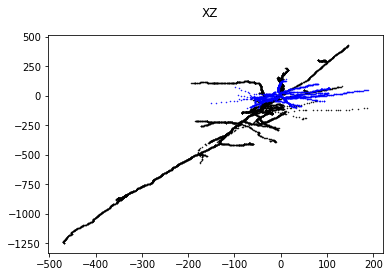

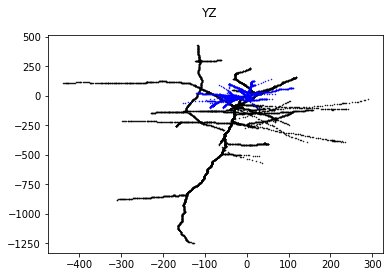

In [9]:
align_morphology_X(morph1,align_vec)

# Plot all three planes
plot_morphologies([morph1],plane = 'XY')
plot_morphologies([morph1],plane = 'XZ')
plot_morphologies([morph1],plane = 'YZ')

### --> For Inhibitory Cell 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


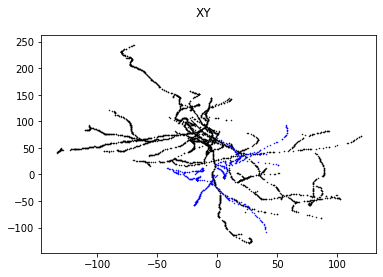

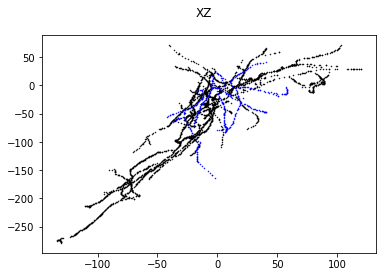

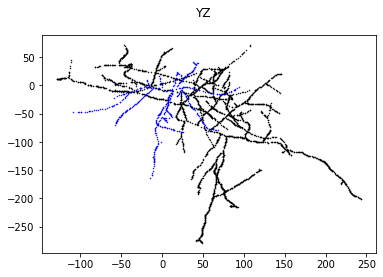

In [10]:
align_morphology_X(morph2,align_vec)

# Plot all three planes
plot_morphologies([morph2],plane = 'XY')
plot_morphologies([morph2],plane = 'XZ')
plot_morphologies([morph2],plane = 'YZ')

## Ex3. Placing cells in a cylinder

<font size='3'>Define a cylinder of radius 210 µm and height 2000 µm. Define 5 random points inside the cylindier to place your cells. The pyramidal cells should be in the region of the column corresponding to layers II-VI, as defined in https://www.cell.com/fulltext/S0092-8674(15)01191-5. The pyramidal cells should have their y axes aligned with the cylinder vertical axes. Larger values on the y axis here should correspond to positions closer to the surface of the column. Two of the pyramidal cells should have their apical dendrites facing up and the other should have its apical dendrites facing down. No rotating or oriented rules have to be applied to the inhibitory cells. Plot the results in 2D, in all three planes. Then, show the result in a 3D plot. [2.5 pts]

<span style="color:red"> Restart kernel out of precaution

### Loading useful functions

In [1]:
# Useful functions
def shift_morphology(morph,shift):
    morph.soma.points[:,[0,1,2]] += shift
    for n in morph.neurites:
        n.points[:,[0,1,2]] += shift

def center_morphology(morph):
    center = morph.soma.center.copy()
    shift_morphology(morph,-center)

def rotate_morphology(morph,R):
    morph.soma.points[:,[0,1,2]] = R.dot(morph.soma.points[:,[0,1,2]].T).T
    for n in morph.neurites:
        n.points[:,[0,1,2]] = R.dot(n.points[:,[0,1,2]].T).T    

def align_morphology_Y(morph,axis):
    # Rotation matrix that aligns the Y axis [0,1,0] to an arbitrary vector b (other than Y or -Y)
    # From https://math.stackexchange.com/a/476311
    a = np.array([0,1,0])

    b = np.array(axis) # target axis
    b = b / np.linalg.norm(b) # make unit norm

    v = np.cross(a,b)     # a x b
    s = np.linalg.norm(v) # ||v|| = sin(theta)
    c = a.dot(b)          # a . b = cos(theta)

    # Skew-symmetric cross-product matrix
    V = np.zeros((3,3))
    V[0,1] = -v[2]
    V[1,0] =  v[2]
    V[0,2] =  v[1]
    V[2,0] = -v[1]
    V[1,2] = -v[0]
    V[2,1] =  v[0]

    # Rotation matrix
    R = np.diag((1.0,1.0,1.0))
    R += V
    R += V.dot(V) * (1.0 - c) / (s * s)

    # Test
    if not np.max(R.dot(a) - b) < 1E-12:
        raise ValueError('Matrix not good!')
    
    # Rotate morphology
    rotate_morphology(morph,R)

# Poorman's plotting of morphologies
def plot_morphology(morph,color = None,plane = 'XY',somaOnly = False):
    colors = ['','','black','blue','red','green'] # colors for: soma, axon, basal, apical
    planes = { 'XY': [0,1], 'XZ': [0,2], 'YZ': [1,2], 'YX': [1,0], 'ZX': [2,0], 'ZY': [2,1] }
    if color is not None:
        colors = ['','',color,color,color,color]
    if not somaOnly:
        for n in morph.neurites:
            pts = n.points[:,[0,1,2]]
            plt.scatter(pts[:,planes[plane][0]],pts[:,planes[plane][1]],s=1,c=colors[n.type.value],marker='.')
    pts = morph.soma.center
    plt.scatter(pts[planes[plane][0]],pts[planes[plane][1]],c=colors[nm.NeuriteType.soma.value],marker='D')

def plot_morphologies(morphlist,plane = 'XY',somaOnly = False):
    colors = ['red','green','blue','magenta','cyan','yellow','orange','purple','brown']
    if len(morphlist) is 1:
        colors = [None]
    if somaOnly:
        colors = ['black' for i in range(0,len(morphlist))]
    fig = plt.figure(figsize=(10,10))
    fig.suptitle(plane)
    for i,m in enumerate(morphlist):
        plot_morphology(m,colors[i % len(colors)],plane = plane,somaOnly = somaOnly)

def morph_get_all_points(morph):
    pts = morph.soma.center.copy()
    for n in morph.neurites:
        pts = np.vstack((pts,n.points[:,[0,1,2]]))
    return pts


# Rotation matrix around Z axis, angle theta CCW (degrees)
def rotz(theta):
    radtheta = theta * np.pi / 180.0 # in radians
    R = np.array([[np.cos(radtheta),-np.sin(radtheta),0],
                  [np.sin(radtheta),np.cos(radtheta),0],
                  [0,0,1]])
    return R


# apply rotation matrix R
def rotate_morphology(morph,R):
    morph.soma.points[:,[0,1,2]] = R.dot(morph.soma.points[:,[0,1,2]].T).T
    for n in morph.neurites:
        n.points[:,[0,1,2]] = R.dot(n.points[:,[0,1,2]].T).T

def rotz_morphology(morph,theta):
    R = rotz(theta)
    rotate_morphology(morph,R)

### Defining the cylinder of radius 210 µm and height 2000µm and placing the 5 random points inside the cylinder

In [2]:
import numpy as np

N = 5 # number of positions

radius = 210 # radius of cylinder
height = 2000 # height of the cylinder
center_pyr =  (height - 165)/2  # subtracting thickness of L1
center_int = height/2 # Obtaining the middle of the height of the cylinder

pos = np.random.randn(3, N) # Obtaining a random int coordinates for the 5 neurons
pos /= np.linalg.norm(pos, axis = 0) # Scaling that value between 0 and 1
pos = pos.T

# Scaling and translating the points so that the pyramidal cells
# are contained within the correct layers
pos[:,(0,2)] *= radius # Scaling so that pyramidal cell soma is within the correct radius

pos[(0,1,2),1] *= center_pyr # Scaling according to the center of the layer for the pyramidal cells
pos[(0,1,2),1] += center_pyr # Translating

pos[(3,4),1] *= center_int # Scaling according ot the center of the cylinder for the inhibitory cells
pos[(3,4),1] += center_int # Translating

pos # The positions of the cells within the cylinder 

array([[-122.17061429,  804.40730675,  168.83219188],
       [  64.29618122,  450.51947528,  168.94333032],
       [ 166.06863403,  789.92030347, -125.17396665],
       [  25.41523862,  152.89402285, -108.66651364],
       [ -42.18361675,  221.72960941, -124.93582657]])

### Correctly placing the pyramidal and inhibitory cells

The pyramidal cells should:
- be in region of column corresponding to layers II-VI
- have their y-axis aligned with cylinder vertical axes (use exercise 2)

(NB: larger values on the y-axis should correspond go positions closer to the of the columnn)

- 2 of the pyramidal cells: should have their apical dendrites facing up
- the other pyramidal cell: should have its apical dendrites afcing down

For the inhibitory cells:
- No rotating or oriented rules have to be applied to inhibitory cells

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import neurom as nm
morph_files = ['morph_06.swc','morph_07.swc','morph_09.swc','morph_10.swc','morph_03.swc'] # 3 pyr and 2 int
morphs = [nm.load_neuron(x) for x in morph_files]

# rotate morph 06 upside down
# Rotating one pyramidal cell so that it is pointing downwards, while the other two are pointing upwards
rotz_morphology(morphs[0],180)


# place all morphologies
for i,m in enumerate(morphs):
    center_morphology(m)
    #align_morphology_Y(m,[0,1,0])
    shift_morphology(m,pos[i])
    

[x.soma.center for x in morphs] # print centers

[array([-122.17061429,  804.40730675,  168.83219188]),
 array([ 64.29618122, 450.51947528, 168.94333032]),
 array([ 166.06863403,  789.92030347, -125.17396665]),
 array([  25.41523862,  152.89402285, -108.66651364]),
 array([ -42.18361675,  221.72960941, -124.93582657])]

### Visualizing the cells in 2D, in all 3 planes:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


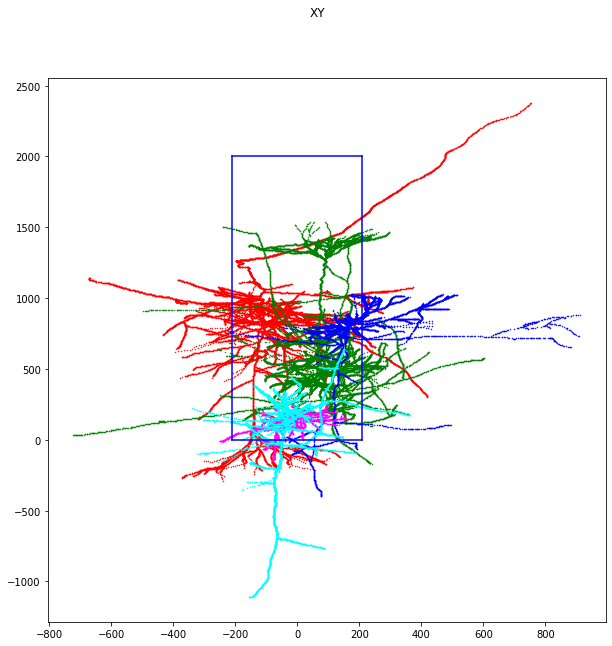

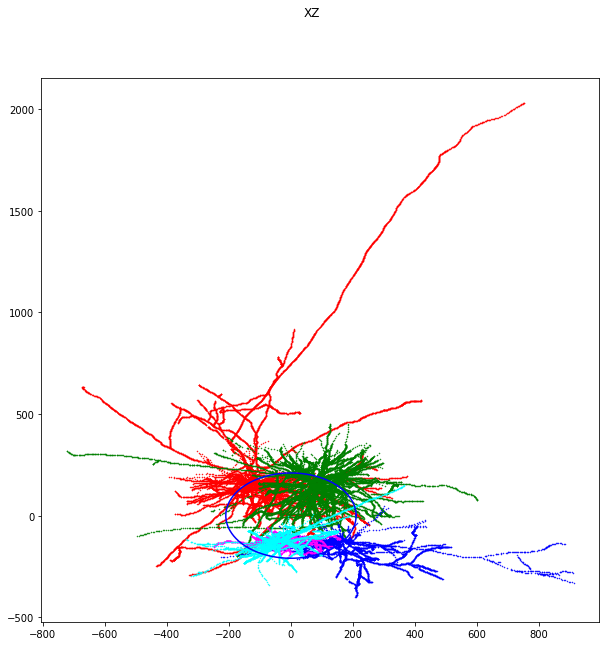

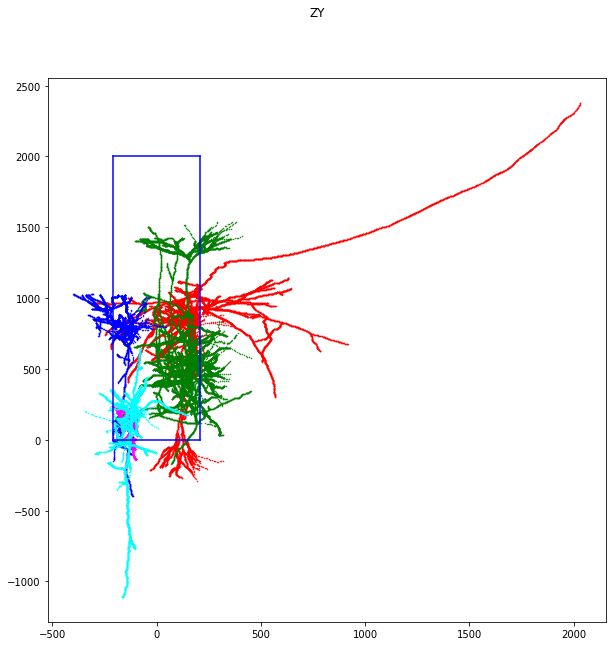

In [7]:
# Visualize in all three planes
r = radius
plot_morphologies(morphs,plane = 'XY')
# Plot rectangle
xh1 = np.linspace(-r,r,100)
yh1 = np.zeros(100)
xh2 = np.linspace(-r,r,100)
yh2 = np.ones(100)*height
xv1 = np.ones(100)*r
yv1 = np.linspace(0,height,100)
xv2 = -np.ones(100)*r
yv2 = np.linspace(0,height,100)
plt.plot(xh1,yh1,'b',xh2,yh2,'b',xv1,yv1,'b',xv2,yv2,'b')


plot_morphologies(morphs,plane = 'XZ')
# Plot circle
angles = np.linspace(0,2.0 * np.pi,360)
xp = radius * np.cos(angles)
yp = radius * np.sin(angles)
plt.plot(xp,yp,'b')

plot_morphologies(morphs,plane = 'ZY')
# Plot rectangle
xh1 = np.linspace(-r,r,100)
yh1 = np.zeros(100)
xh2 = np.linspace(-r,r,100)
yh2 = np.ones(100)*height
xv1 = np.ones(100)*r
yv1 = np.linspace(0,height,100)
xv2 = -np.ones(100)*r
yv2 = np.linspace(0,height,100)
plt.plot(xh1,yh1,'b',xh2,yh2,'b',xv1,yv1,'b',xv2,yv2,'b')

### Plot the results in 3D

In [8]:
!pip install plotly

Do not use pip without activating a virtual environment first!
You might break your default Python environment and not be able to start Jupyter again.
Check the Documentation on how to deal with virtual environments.


In [ ]:
# From https://stackoverflow.com/a/53445592
# Import dependencies
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

colors = ['red','green','blue','magenta','cyan','yellow','orange','purple','brown']

data = []
for i,m in enumerate(morphs):
    print('Tracing morph points, cell n {}'.format(i+1))
    pts = morph_get_all_points(m)
    # Configure the trace.
    trace = go.Scatter3d(
        x=pts[:,0],  # <-- Put your data instead
        y=pts[:,1],  # <-- Put your data instead
        z=pts[:,2],  # <-- Put your data instead
        mode='markers',
        marker={
            'size': 1,
            'opacity': 1.0,
            'color': colors[i]
        }
    )
    data.append(trace)
    
print('Morph points done')

# Overimpose somas
somas = np.array([m.soma.center for m in morphs])
trace = go.Scatter3d(
    x=somas[:,0],  # <-- Put your data instead
    y=somas[:,1],  # <-- Put your data instead
    z=somas[:,2],  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 5,
        'opacity': 1.0,
        'color': 'black'
    }
)
data.append(trace)

print('Cells soma overimposed ')

a1 = 0

def cylinder(r, h, a =0, nt=100, nv =50):
    """
    parametrize the cylinder of radius r, height h, base point a
    """
    theta = np.linspace(0, 2*np.pi, nt)
    v = np.linspace(a, a+h, nv )
    theta, v = np.meshgrid(theta, v)
    x = r*np.cos(theta)
    y = v
    z = r*np.sin(theta)
    return x, y, z


x, y, z = cylinder(r, height, a=a1)
cyl = go.Surface(
    x= x,
    y= y,
    z= z,
    opacity = 0.3,
    showscale = False
)

print('Cylinder done')

data.append(cyl)

print('Ready to plot')
    
# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)


## Ex4. Synaptic Pruning

<font size='3'> The vector provided below represents the number of appositions for a particular EXC-INH connection type. Implement the synapse pruning algorithm from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4597796/. Use the following parameter values: B<sub>d</sub> = 0.2. The scaling factor when calculating the post-pruning bouton density is 10^5. After each step, plot a histogram of synapses per connection. At the end, represent the results with two histograms, one histogram of synapses per active connection, and one of synapses per reserve connection. Note that as the data are made up, you should not expect to see the same results as in the paper. 

<span style="color:red"> Restart kernel out of precaution

In [10]:
import numpy as np
import matplotlib.pyplot as plt


In [21]:
# Number of appositions for a particular EXC-INH connection type
appositions = np.concatenate((np.ones(5000),2*np.ones(4500),3*np.ones(4000),4*np.ones(3500),5*np.ones(3000),\
                              6*np.ones(2500),7*np.ones(2000),8*np.ones(1700),9*np.ones(1600),10*np.ones(1500),\
                              11*np.ones(1200),12*np.ones(1000),13*np.ones(800),14*np.ones(800),15*np.ones(700),\
                              16*np.ones(600),17*np.ones(550),18*np.ones(500),19*np.ones(450),20*np.ones(400)))

appositions = appositions.astype(int)
appositions

array([ 1,  1,  1, ..., 20, 20, 20])

### Plotting the initial distribution provided by the vector for a particular EXC-INH connection type

Text(0, 0.5, 'P')

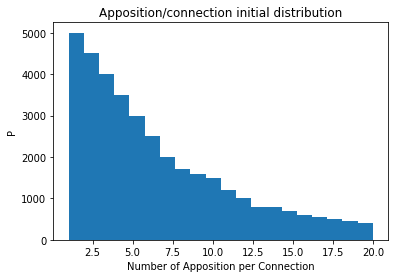

In [22]:
# Plotting the distribution of appositions:

plt.hist(appositions, bins = 20)
plt.title("Apposition/connection initial distribution")
plt.xlabel("Number of Apposition per Connection")
plt.ylabel("P")

### Implementing the synapse pruning algorithm:

In [32]:
# Defining the parameters that we want

scaling_fact = 10e5 # Scaling factor when calculating the post-pruning bouton density

# Computing the 3 parameters:
S_m = np.mean(appositions)
S_sd = np.std(appositions)
B_d = 0.2 # Bouton density

# Defining the total number of connections we are considering
num_connections = len(appositions)
print("The total number of connections we are considering is: "+str(num_connections))

The total number of connections we are considering is: 36300


### General Pruning

The first step consists in eliminating potential synapses until the right side of the distribution matched the biological data, by considering the fraction of potential synapses that remain in an m-type to m-type specific connection after general pruning.

In [47]:
import random

# Defining geometrical distribution:

p = 1/S_m # Mean apposition per connections

p_prime = 1/(S_sd + 0.5)

# Fraction of potential synapses
f_1 = (p/(1-p))*((1-p_prime)/p_prime)

# Randomly removing a fraction (1-f_1) of potential synapses:
# As mentionned in the methods: for each synapse, drew independent random number R in interval [0,1) and compared it to f_1
# If R < f_1, potential synapse was admitted to the second step, or else kept in an inactive pool accessible to structural plasticiy mechanisms

appositions_general_pruned = appositions.copy()

for connection in range(num_connections):
    kept_synapses = np.zeros((1, appositions[connection]))
    
    R = np.random.rand(appositions[connection])
    R_kept = len(R[R<f_1])
    
    appositions_general_pruned[connection] = R_kept

Text(0, 0.5, 'P')

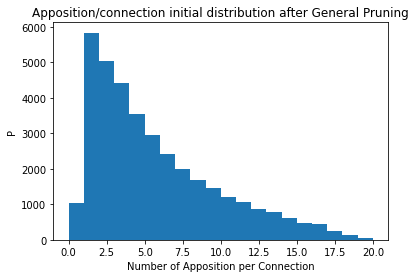

In [48]:
# Plotting the distribution of appositions after General Pruning:

plt.hist(appositions_general_pruned, bins = 20)
plt.title("Apposition/connection initial distribution after General Pruning")
plt.xlabel("Number of Apposition per Connection")
plt.ylabel("P")

Text(0, 0.5, 'P')

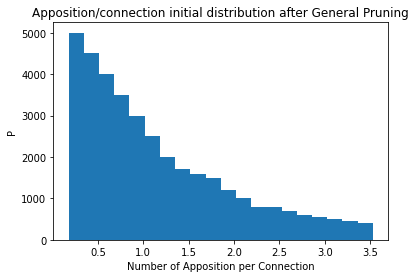

In [38]:
plt.hist(appositions*(1-f_1), bins = 20)
plt.title("Apposition/connection initial distribution after General Pruning")
plt.xlabel("Number of Apposition per Connection")
plt.ylabel("P")

As seen in the article, we have reduced the number of apposition per connection distributio to the right, shifting the reducing the distribution from 20 to 3.5

### Multi-Synaptic Pruning

The second step consists in pruning all potential synapses belonging to connections with too few potential synapses to match the left side of the biological distribution.

In [ ]:
# Defining the second parameter of the distribution µ2, defining the placement of a sigmoidal cutoff function

### Plasticity-Reserve Pruning

### Resulting 2 histograms:
- Histogram of synapses per active connection
- Histogram of synapses per reserve connection